In [94]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [95]:
## Read the CSV files into DataFrames
#combine the two CSV files into one DataFrame
df1 = pd.read_csv('coin_gecko_2022-03-16.csv')
df2 = pd.read_csv('coin_gecko_2022-03-17.csv')

In [96]:
df = pd.concat([df1, df2], ignore_index=True)
# df = df.drop_duplicates(subset=['id'], keep='last')

In [97]:
df

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40859.460000,0.022,0.030,0.055,3.539076e+10,7.709915e+11,2022-03-16
1,Ethereum,ETH,2744.410000,0.024,0.034,0.065,1.974870e+10,3.271044e+11,2022-03-16
2,Tether,USDT,1.000000,-0.001,-0.001,0.000,5.793497e+10,7.996516e+10,2022-03-16
3,BNB,BNB,383.430000,0.018,0.028,0.004,1.395854e+09,6.404382e+10,2022-03-16
4,USD Coin,USDC,0.999874,-0.001,0.000,-0.000,3.872274e+09,5.222214e+10,2022-03-16
...,...,...,...,...,...,...,...,...,...
995,IRISnet,IRIS,0.055426,0.016,-0.003,-0.088,2.976839e+06,6.809024e+07,2022-03-17
996,Circuits of Value,COVAL,0.037961,0.002,-0.012,-0.054,3.667870e+05,6.782627e+07,2022-03-17
997,ARPA Chain,ARPA,0.069003,-0.000,0.008,-0.037,1.363376e+07,6.776284e+07,2022-03-17
998,SuperRare,RARE,0.464613,-0.003,0.014,0.019,9.398219e+06,6.738822e+07,2022-03-17


In [98]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [120]:
#copy data 
stock_data = df.copy()
stock_data = stock_data.set_index("date")
stock_data.columns

Index(['coin', 'symbol', 'price', '1h', '24h', '7d', '24h_volume', 'mkt_cap'], dtype='object')

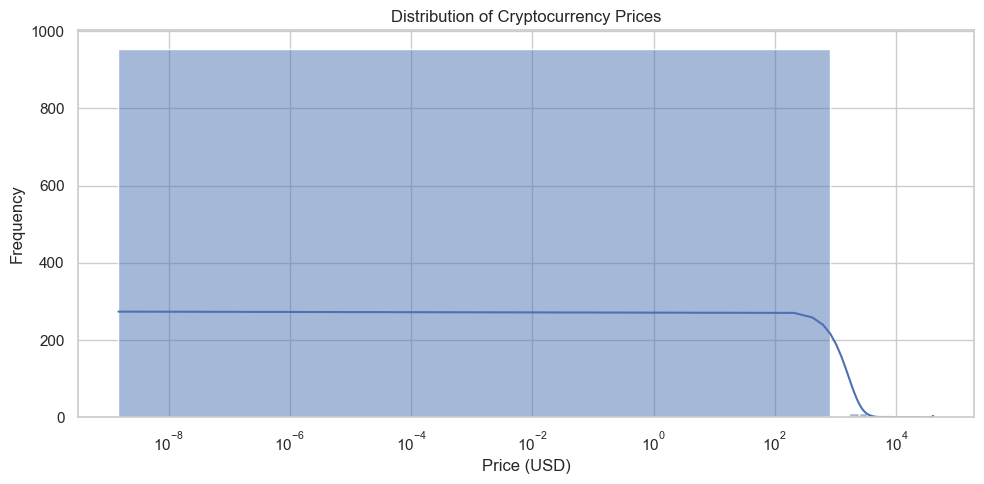

In [100]:
# Convert the 'price' column to numeric, forcing errors to NaN

# Set seaborn style
sns.set(style="whitegrid")

# Histogram of Prices
plt.figure(figsize=(10, 5))
sns.histplot(stock_data['price'], bins=50, kde=True)
plt.title('Distribution of Cryptocurrency Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.xscale('log')  # Helps with long tail
plt.grid(True)
plt.tight_layout()
plt.show()




1. 📊 Price Distribution:

    The price distribution is highly skewed:
    Most cryptocurrencies are priced under $100.
    A few dominant coins (like Bitcoin and Ethereum) have very high prices, which is why a log scale was used.
    This long-tail distribution is typical in crypto markets where many tokens have low value and low trading volume.

Insight: The market is dominated by a few high-priced coins, while the majority are low-value altcoins.

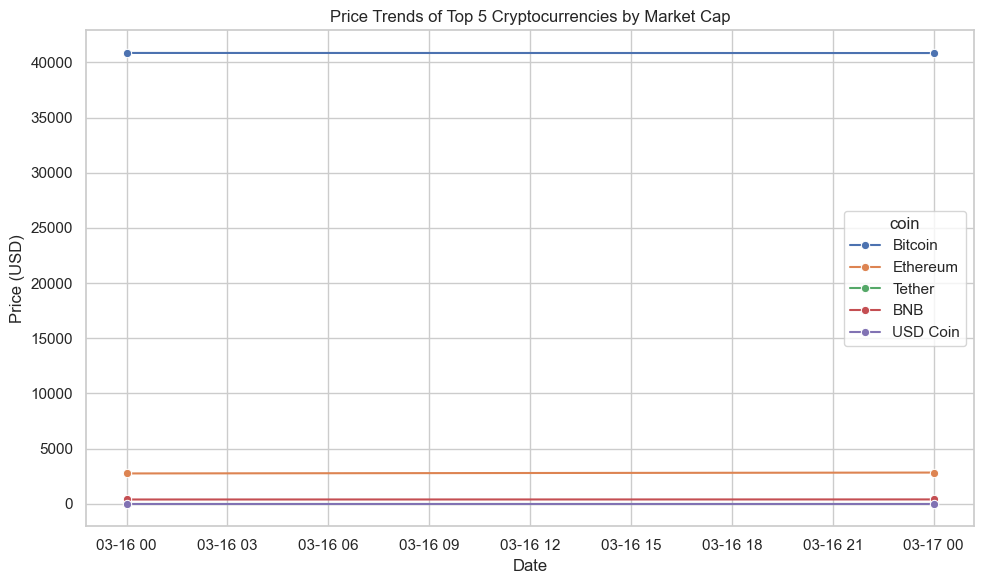

In [101]:
# Top 5 by Market Cap
top5_coins = stock_data.groupby('coin')['mkt_cap'].mean().sort_values(ascending=False).head(5).index
top5_data = stock_data[stock_data['coin'].isin(top5_coins)]

# Line plot of top 5 coin prices
plt.figure(figsize=(10, 6))
sns.lineplot(data=top5_data, x='date', y='price', hue='coin', marker='o')
plt.title('Price Trends of Top 5 Cryptocurrencies by Market Cap')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

2. 📈 Price Trends of Top 5 Coins:

    The top 5 cryptocurrencies by market cap (e.g., Bitcoin, Ethereum, etc.) showed relatively stable prices over the two days.
    There were small fluctuations, but no sharp spikes or crashes.
    This reflects that high market cap coins are more stable, partly due to higher liquidity and investor confidence.
    
Insight: Large-cap coins tend to be more stable and less volatile in the short term, indicating higher liquidity and maturity

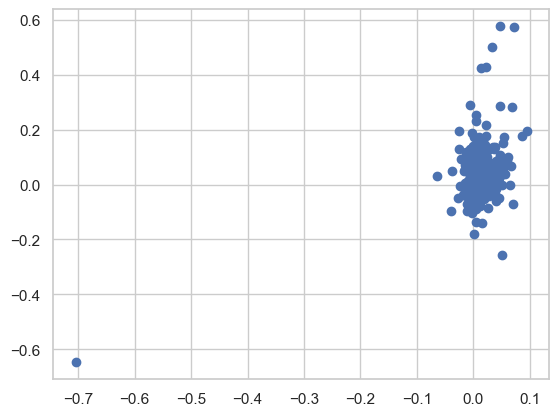

In [102]:
plt.scatter(stock_data['1h'],stock_data['24h'])

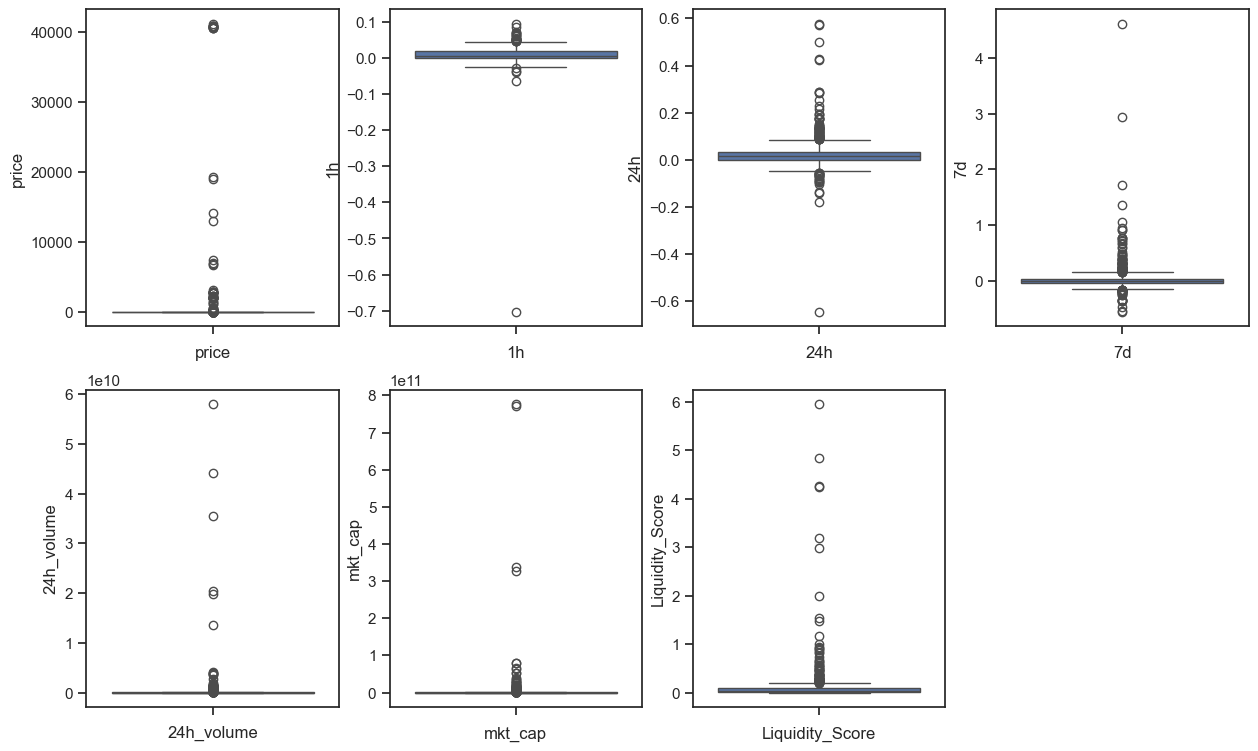

In [128]:
import matplotlib.pyplot as plt 
import seaborn as sns 
num_features = [features for features in stock_data.columns if stock_data[features].dtype != 'O']
plt.figure(figsize=(15,14))
for i in range(len(num_features)):
    plt.subplot(3,4,i+1)
    sns.set_style('ticks')
    plt.xlabel(num_features[i])
    px = sns.boxplot(stock_data[num_features[i]])

Some Outliers are present in various columns such as    'price',
                                                        '1h', 
                                                        '24h', 
                                                        '7d', 
                                                        '24h_volume', 
                                                        'mkt_cap',
                                                        'Liquidity_Score'